In [89]:
library(keras)

**The Mnist Datset was feed into appropriate vectors**

In [90]:
c(c(TrainF,TrainL),c(TestF,TestL)) %<-% dataset_mnist()

**The Vectors are flattened from 3D tensor to 2D tensor where 28 times 28 equals 784 pixels**

In [91]:
array_reshape(TrainF,dim = c(nrow(TrainF),784)) -> Train_1
array_reshape(TestF,dim = c(nrow(TestF),784)) -> Test_1

**Since we are dealing with Vectors , Labels are cobverted into one Hot vectors**

In [92]:
to_categorical(TrainL) -> Train_2
to_categorical(TestL) -> Test_2

**Features are normalised in range 0 to 1 to make the model converge faster**

In [93]:
Train_1 <- Train_1 / 255
Train_2 <- Train_2 / 255

In [94]:
model <- keras_model_sequential()

Constructing the Whole Archietecture
* First Layer consist of 128 nodes
* Second Layer consist of 64 nodes
* Output layer consst of 10 nodes corresponding to each of the categories and hence softmax layer

In [95]:
model %>%
    layer_dense(units=128,activation = "relu",input_shape = c(784)) %>%
    layer_dense(units=64,activation = "relu") %>%
    layer_dense(units = 10,activation = "softmax")

In [96]:
model %>% compile(loss = "categorical_crossentropy",optimizer =optimizer_rmsprop(),metrics = c("accuracy"))

In [100]:
History <- model %>% fit(Train_1,Train_2,epochs=18,batch_size = 32,validation_split = 0.25,verbose = 1,callbacks = callback_early_stopping(patience = 4),shuffle = T)

* The Model was trained using Batch size of 32 for 18 epochs(Whole Training was trained 18 times) 
* Early Stopping here stops the model as soon as keras finds the model starts to overfit and allows a penatlty of less accuracy on valdation set for maximum for 2 epochs

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"span too small.   fewer data values than degrees of freedom."Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 0.98"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 2.02"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  0"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 4.0804"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"span too small.   fewer data values than degrees of freedom."Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 0.98"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = para

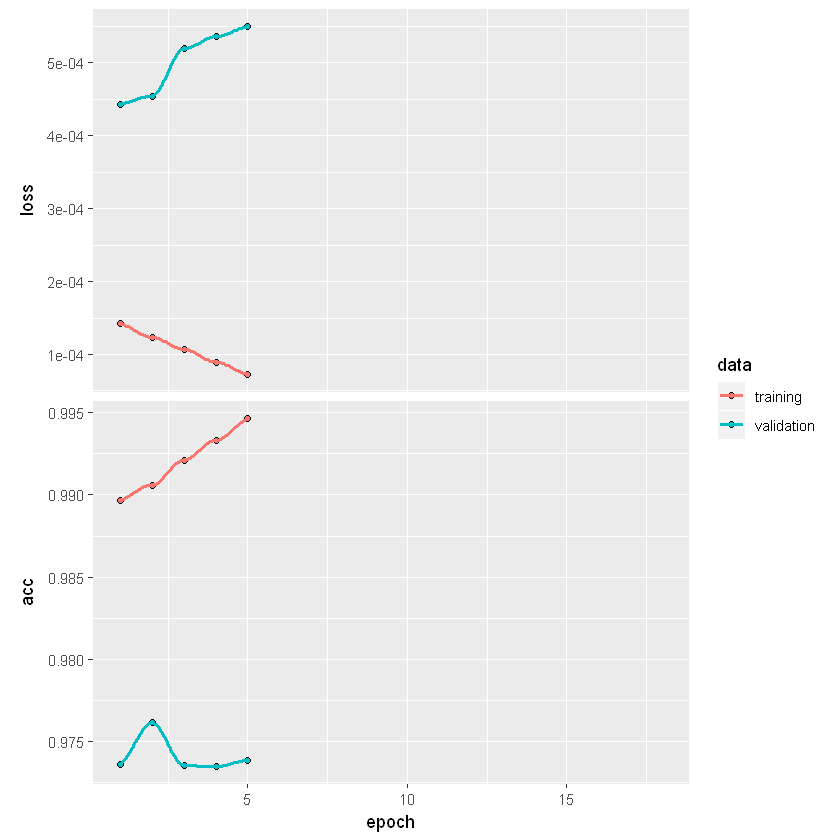

In [101]:
plot(History)

In [102]:
model %>% evaluate(Test_1,Test_2)

$loss
[1] 0.3859367

$acc
[1] 0.9759

**Final Accuracy on test Set 97.71**